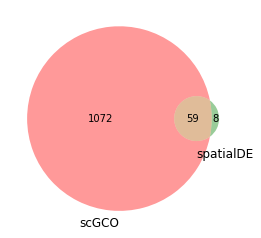

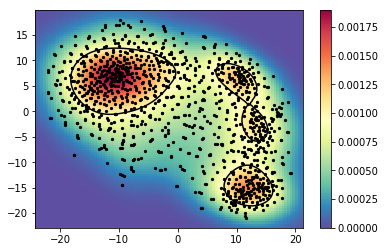

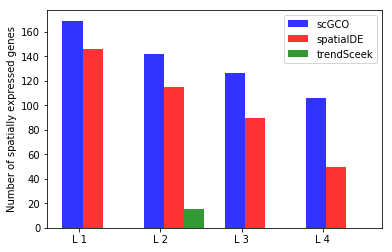

In [2]:
# generate figure 2A, 2B and 2D as shown in the manuscript
from matplotlib_venn import venn2, venn2_circles
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scGCO
import os


# plot Fig. 2A
gco = 'scGCO_results/MOB_Rep11.csv'
counts_gco = pd.read_csv(gco, index_col=1)
counts_gco=counts_gco[counts_gco.fdr<0.01]
de = 'SpatialDE_results/MOB_Rep11.csv'
counts_de = pd.read_csv(de)
counts_de=counts_de[counts_de.qval<0.05]   
counts_de=counts_de[counts_de.g.values != 'log_total_count']
#ax = axes[0]
v=venn2(subsets=[set(counts_gco.index.values), 
                       set(counts_de.g.values)], 
                        set_labels = ('scGCO', 'spatialDE'))

v.set_labels[1].set_horizontalalignment('left')
v.set_labels[1].set_horizontalalignment('left')
v.set_labels[1].set_horizontalalignment('left')

plt.show()

# plot Fig. 2B
ff = 'Data//Rep11_MOB_count_matrix-1.tsv'
locs, data = scGCO.read_spatial_expression(ff)
# remove genes expressed in less than 10 cells
data = data.loc[:,(data != 0).astype(int).sum(axis=0) >= 10]
# normalize expression and use 1000 genes to test the algorithm
data_norm = scGCO.normalize_count_cellranger(data)
tsne_proj = scGCO.spatial_pca_tsne(data_norm, counts_gco.index)
zz = scGCO.visualize_tsne_density(tsne_proj)

# plot Fig. 2D
gco_brca_dict = dict()
gco_brca_sample = list()
de_brca_sample = list()
de_brca_dict = dict()
gco_brca_res=list()

for i in np.arange(4)+1: 
    oo = 'scGCO_results/BC_Layer'+str(i)+'.csv' 
    counts = pd.read_csv(oo) 
    counts=counts[counts.fdr<0.05] 
    gco_brca_res.append(counts.shape[0])
    for kk in counts.iloc[:,0].values:
        if kk in gco_brca_dict:
            gco_brca_dict[kk] = gco_brca_dict[kk] + 1
        else:
                gco_brca_dict[kk] = 1
                
de_brca_res=list()
for i in np.arange(4)+1: 
    oo = 'SpatialDE_results/BC_Layer'+str(i)+'.csv' 
    counts = pd.read_csv(oo) 
    counts=counts[counts.qval<0.05] 
    counts=counts[counts.g.values != 'log_total_count'] 
    de_brca_res.append(counts.shape[0])
    for kk in counts.g.values:
        if kk in de_brca_dict:
            de_brca_dict[kk] = de_brca_dict[kk] + 1
        else:
            de_brca_dict[kk] = 1

tre_res=list()
for i in np.arange(4)+1:

    oo='Trendsceek/results//BC_Layer'+str(i)+'.csv'
    if os.path.exists(oo):
        counts=pd.read_csv(oo)
        sig_gene=counts.shape[0]
    else:
        sig_gene=0
    tre_res.append(sig_gene)  
            
n_groups = 4
means_scGCO = gco_brca_res
means_spatialDE = de_brca_res
means_trendsceek=tre_res

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.8
 
rects1 = plt.bar(index, means_scGCO, bar_width,
                 alpha=opacity,
                 color='b',
                 label='scGCO')
 
rects2 = plt.bar(index + bar_width, means_spatialDE, bar_width,
                 alpha=opacity,
                 color='r',
                 label='spatialDE')

rects3=plt.bar(index+2*bar_width,means_trendsceek,bar_width,
              alpha=opacity,
              color='g',
              label='trendSceek')
 
plt.xlabel('')
plt.ylabel('Number of spatially expressed genes')
# plt.title('Number of spatially expressed genes')
glabel = list()
for i in np.arange(4)+1:
    temp = 'L '+str(i)
    glabel.append(temp)
plt.xticks(index + bar_width/3, glabel)
plt.legend(loc='upper right')
plt.show()
# plot Fig. 1D